In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Standard library packages
import os

# Import Numpy, Pandas and Seaborn
import numpy as np
import pandas as pd
import seaborn as sns

# Import biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastpCommandline

# Colour scale transformation
from matplotlib.colors import LogNorm

In [2]:
# Define input and output directories
with open("speciesList.txt") as f:
        speciesList = [x.rstrip() for x in f]
speciesStr = '_'.join(speciesList)
rPath = os.getcwd()
s1 = rPath+'/../../../../species/'+speciesList[0]+'/raw/longest_isoform_'+speciesList[0]+'Proteins.fasta'
s2 = rPath+'/../../../../species/'+speciesList[1]+'/raw/'+speciesList[1]+'Proteins.fasta'
outdir = rPath+'/../../../../species/crossSpecies/'+speciesStr+'/RBH/'
os.makedirs(outdir, exist_ok=True)
# Define output BLAST results
fwd_out = os.path.join(outdir, '05-fwd-results.tab')
rev_out = os.path.join(outdir, '05-rev-results.tab')

In [3]:
# Create BLAST command-lines for forward and reverse BLAST searches
blastp='/Users/mmeynadier/Documents/PhD/scripts/tools/ncbi-blast/bin/blastp'
fwd_blastp = NcbiblastpCommandline(cmd=blastp,query=s1, subject=s2, out=fwd_out,
                                   outfmt="6 qseqid sseqid pident qcovs qlen slen length bitscore evalue",
                                   max_target_seqs=1)
rev_blastp = NcbiblastpCommandline(cmd=blastp,query=s2, subject=s1, out=rev_out,
                                   outfmt="6 qseqid sseqid pident qcovs qlen slen length bitscore evalue",
                                   max_target_seqs=1)

# Inspect command-lines
print("FORWARD: %s" % fwd_blastp)
print("REVERSE: %s" % rev_blastp)

FORWARD: /Users/mmeynadier/Documents/PhD/scripts/tools/ncbi-blast/bin/blastp -out /Users/mmeynadier/Documents/PhD/scripts/GD_ECT_Cnidaria/py_scripts/miscellaneous/../../../../species/crossSpecies/Aiptasia_Hydractinia/RBH/05-fwd-results.tab -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue" -query /Users/mmeynadier/Documents/PhD/scripts/GD_ECT_Cnidaria/py_scripts/miscellaneous/../../../../species/Aiptasia/raw/longest_isoform_AiptasiaProteins.fasta -max_target_seqs 1 -subject /Users/mmeynadier/Documents/PhD/scripts/GD_ECT_Cnidaria/py_scripts/miscellaneous/../../../../species/Hydractinia/raw/HydractiniaProteins.fasta
REVERSE: /Users/mmeynadier/Documents/PhD/scripts/tools/ncbi-blast/bin/blastp -out /Users/mmeynadier/Documents/PhD/scripts/GD_ECT_Cnidaria/py_scripts/miscellaneous/../../../../species/crossSpecies/Aiptasia_Hydractinia/RBH/05-rev-results.tab -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue" -query /Users/mmeynadier/Documents/PhD/script

In [4]:
# Run BLAST searches
fwd_stdout, fwd_stderr = fwd_blastp()
rev_stdout, rev_stderr = rev_blastp()

# Check STDOUT, STDERR
print("FWD STDOUT: %s" % fwd_stdout)
print("FWD STDERR: %s" % fwd_stderr)
print("REV STDOUT: %s" % rev_stdout)
print("REV STDERR: %s" % rev_stderr)

FWD STDOUT: 
FWD STDERR: Warning: [blastp] Examining 5 or more matches is recommended

REV STDOUT: 
REV STDERR: Warning: [blastp] Examining 5 or more matches is recommended



In [5]:
# Load the BLAST results into Pandas dataframes
fwd_results = pd.read_csv(fwd_out, sep="\t", header=None)
rev_results = pd.read_csv(rev_out, sep="\t", header=None)

# Add headers to forward and reverse results dataframes
headers = ["query", "subject", "identity", "coverage",
           "qlength", "slength", "alength",
           "bitscore", "E-value"]
fwd_results.columns = headers
rev_results.columns = headers

In [6]:
# Create a new column in both dataframes: normalised bitscore
fwd_results['norm_bitscore'] = fwd_results.bitscore/fwd_results.qlength
rev_results['norm_bitscore'] = rev_results.bitscore/rev_results.qlength

# Create query and subject coverage columns in both dataframes
fwd_results['qcov'] = fwd_results.alength/fwd_results.qlength
rev_results['qcov'] = rev_results.alength/rev_results.qlength
fwd_results['scov'] = fwd_results.alength/fwd_results.slength
rev_results['scov'] = rev_results.alength/rev_results.slength

# Clip maximum coverage values at 1.0
fwd_results['qcov'] = fwd_results['qcov'].clip(upper=1)
rev_results['qcov'] = rev_results['qcov'].clip(upper=1)
fwd_results['scov'] = fwd_results['scov'].clip(upper=1)
rev_results['scov'] = rev_results['scov'].clip(upper=1)

In [7]:
# Inspect the forward results data
fwd_results.head()

,query,subject,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov
0,XP_020891793.1,HyS0002.10,27.358,58,176,2354,106,35.4,1.200000e-02,0.201136,0.602273,0.045030
1,XP_020891793.1,HyS0002.10,28.000,58,176,2354,50,26.6,9.800000e+00,0.151136,0.284091,0.021240
2,XP_020891794.1,HyS0102.45,54.331,71,179,163,127,142.0,6.990000e-44,0.793296,0.709497,0.779141
3,XP_020891796.1,HyS0054.90,62.000,20,488,483,100,144.0,5.920000e-38,0.295082,0.204918,0.207039
4,XP_020891799.1,HyS0048.57,25.210,19,578,11013,119,33.5,4.800000e-01,0.057958,0.205882,0.010805


In [8]:
# Inspect the reverse results data
rev_results.head()

,query,subject,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov
0,HyS0001.1,XP_020905405.1,38.793,96,115,280,116,64.7,1.560000e-13,0.562609,1.000000,0.414286
1,HyS0001.2,XP_020915632.1,27.083,50,169,3091,96,33.1,1.000000e-01,0.195858,0.568047,0.031058
2,HyS0001.3,XP_020896437.1,45.370,44,241,383,108,60.8,1.150000e-10,0.252282,0.448133,0.281984
3,HyS0001.4,XP_020896437.1,55.000,61,471,383,100,82.8,4.020000e-17,0.175796,0.212314,0.261097
4,HyS0001.4,XP_020896437.1,28.718,61,471,383,195,30.8,2.400000e+00,0.065393,0.414013,0.509138


/var/folders/b3/5hwmrgld12d6x6qy5vcd3lh40000gq/T/ipykernel_23394/1257994760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fwd_results.norm_bitscore, color="b", ax=axes[0], axlabel="forward normalised bitscores")
/var/folders/b3/5hwmrgld12d6x6qy5vcd3lh40000gq/T/ipykernel_23394/1257994760.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

<AxesSubplot: xlabel='reverse normalised bitscores', ylabel='Density'>

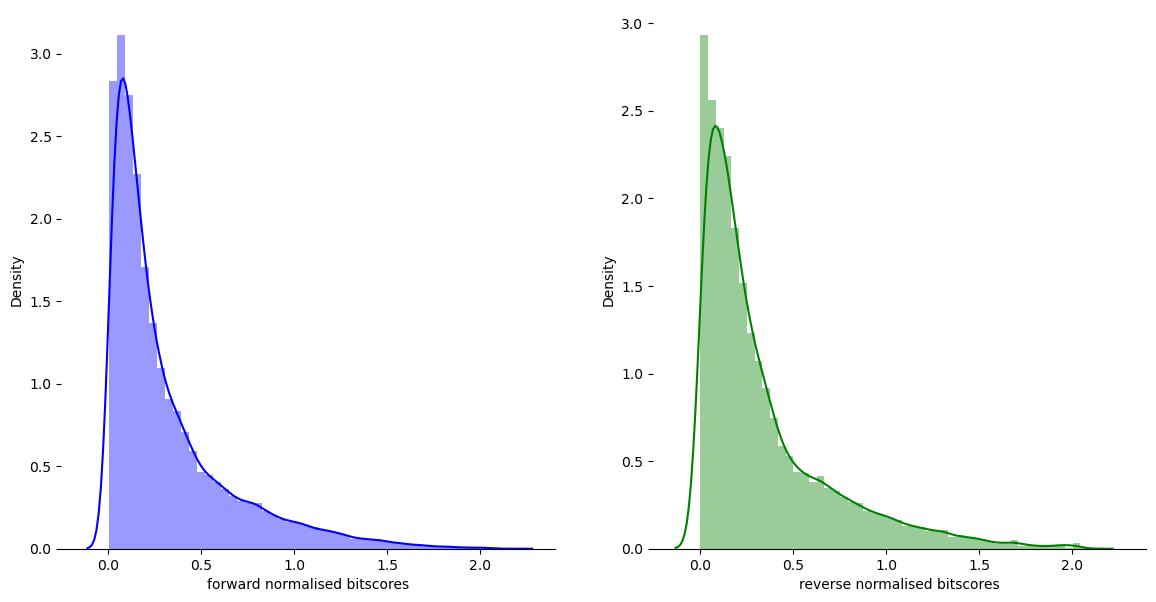

In [9]:
# Set up the figure
f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
sns.despine(left=True)

# Plot distribution of forward and reverse hit bitscores
sns.distplot(fwd_results.norm_bitscore, color="b", ax=axes[0], axlabel="forward normalised bitscores")
sns.distplot(rev_results.norm_bitscore, color="g", ax=axes[1], axlabel="reverse normalised bitscores")

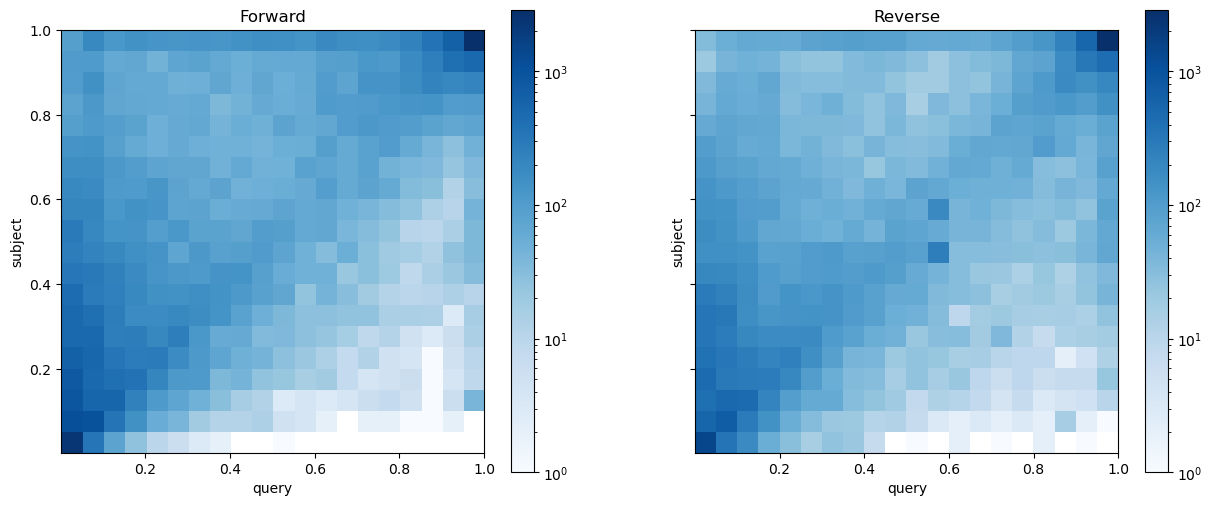

In [10]:
# Plot 2D density histograms

# Calculate 2D density histograms for counts of matches at several coverage levels
(Hfwd, xedgesf, yedgesf) = np.histogram2d(fwd_results.qcov, fwd_results.scov, bins=20)
(Hrev, xedgesr, yedgesr) = np.histogram2d(rev_results.qcov, rev_results.scov, bins=20)

# Create a 1x2 figure array
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Plot histogram for forward matches
im = axes[0].imshow(Hfwd, cmap=plt.cm.Blues, norm=LogNorm(),
                    extent=[xedgesf[0], xedgesf[-1], yedgesf[0], yedgesf[-1]],
                    origin='lower', aspect=1)
axes[0].set_title("Forward")
axes[0].set_xlabel("query")
axes[0].set_ylabel("subject")

# Plot histogram for reverse matches
im = axes[1].imshow(Hrev, cmap=plt.cm.Blues, norm=LogNorm(),
                    extent=[xedgesr[0], xedgesr[-1], yedgesr[0], yedgesr[-1]],
                    origin='lower', aspect=1)
axes[1].set_title("Reverse")
axes[1].set_xlabel("query")
axes[1].set_ylabel("subject")

# Add colourbars
fig.colorbar(im, ax=axes[0])
fig.colorbar(im, ax=axes[1])

In [11]:
# Merge forward and reverse results
rbbh = pd.merge(fwd_results, rev_results[['query', 'subject']],
                left_on='subject', right_on='query',
                how='outer')

# Discard rows that are not RBH
rbbh = rbbh.loc[rbbh.query_x == rbbh.subject_y]

# Group duplicate RBH rows, taking the maximum value in each column
rbbh = rbbh.groupby(['query_x', 'subject_x']).max()

In [12]:
# Inspect the results
rbbh.head()

,,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov,query_y,subject_y
query_x,subject_x,,,,,,,,,,,,
XP_020891809.1,HyS0118.15,81.614,75.0,783.0,541.0,446.0,750.0,4.900000e+00,0.957854,0.569604,0.824399,HyS0118.15,XP_020891809.1
XP_020891810.1,HyS0061.20,42.140,94.0,559.0,579.0,598.0,310.0,1.680000e-98,0.554562,1.000000,1.000000,HyS0061.20,XP_020891810.1
XP_020891811.1,HyS0060.117,34.858,95.0,480.0,462.0,459.0,266.0,6.600000e-84,0.554167,0.956250,0.993506,HyS0060.117,XP_020891811.1
XP_020891814.1,HyS0001.670,52.308,96.0,465.0,490.0,455.0,486.0,9.000000e-170,1.045161,0.978495,0.928571,HyS0001.670,XP_020891814.1
XP_020891815.2,HyS0061.43,57.325,93.0,478.0,717.0,471.0,511.0,3.150000e-176,1.069038,0.985356,0.656904,HyS0061.43,XP_020891815.2


/var/folders/b3/5hwmrgld12d6x6qy5vcd3lh40000gq/T/ipykernel_23394/2845910463.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rbbh.norm_bitscore, color="b", axlabel="RBH normalised bitscores")


<AxesSubplot: xlabel='RBH normalised bitscores', ylabel='Density'>

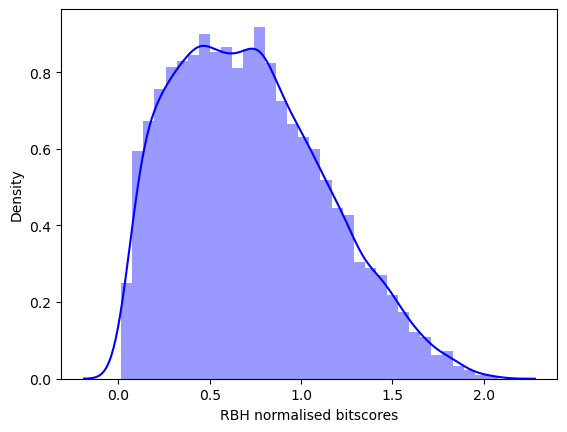

In [13]:
# Plot distribution of RBH bitscores
sns.distplot(rbbh.norm_bitscore, color="b", axlabel="RBH normalised bitscores")

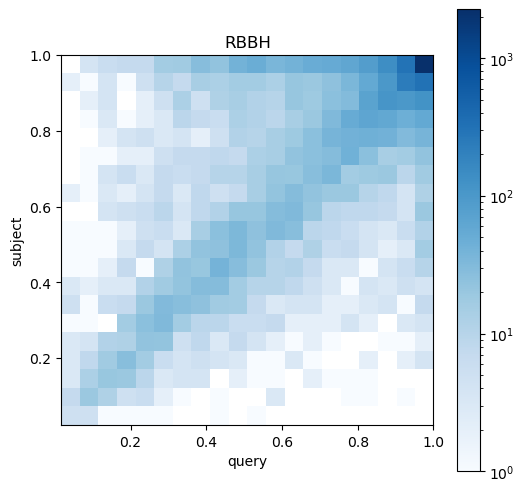

In [14]:
# Plot 2D density histograms

# Calculate 2D density histograms for counts of matches at several coverage levels
(H, xedges, yedges) = np.histogram2d(rbbh.qcov, rbbh.scov, bins=20)

# Create a 1x2 figure array
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True)

# Plot histogram for RBBH
im = ax.imshow(H, cmap=plt.cm.Blues, norm=LogNorm(),
                 extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                 origin='lower', aspect=1)
ax.set_title("RBBH")
ax.set_xlabel("query")
ax.set_ylabel("subject")

# Add colourbar
fig.colorbar(im, ax=ax)

In [15]:
# Search for markers genes
"""
with open("cnidocyteMarkers.txt") as f:
        listMarkers = [x.rstrip() for x in f]
markerDf = pd.DataFrame()
query_x_list = []
subject_x_list = []
for i in listMarkers:
        res = rbbh[rbbh['query_y']==i] 
        if res.empty != True:
                query_x_list.append(res['subject_y'].iloc[0])
                subject_x_list.append(res['query_y'].iloc[0]) 
                markerDf = pd.concat([markerDf,res])
idx=0
markerDf.insert(loc=idx,column='subject_x',value=subject_x_list)
markerDf.insert(loc=idx,column='query_x',value=query_x_list)
#markerDf.to_csv(outdir+'/RBH_markerGenes.csv',index=False)
"""

'\nwith open("cnidocyteMarkers.txt") as f:\n        listMarkers = [x.rstrip() for x in f]\nmarkerDf = pd.DataFrame()\nquery_x_list = []\nsubject_x_list = []\nfor i in listMarkers:\n        res = rbbh[rbbh[\'query_y\']==i] \n        if res.empty != True:\n                query_x_list.append(res[\'subject_y\'].iloc[0])\n                subject_x_list.append(res[\'query_y\'].iloc[0]) \n                markerDf = pd.concat([markerDf,res])\nidx=0\nmarkerDf.insert(loc=idx,column=\'subject_x\',value=subject_x_list)\nmarkerDf.insert(loc=idx,column=\'query_x\',value=query_x_list)\n#markerDf.to_csv(outdir+\'/RBH_markerGenes.csv\',index=False)\n'

In [16]:
# Discard duplicate RBH

def discardDuplicate(filePath):
    df = pd.read_csv(filePath,sep='\t',header=None)
    df.columns = ['qseqid','sseqid','pident','qcovs','qlen','slen','length','bitscore','evalue']
    df2 = df.groupby(['qseqid', 'sseqid']).first()
    return df2

forwardCured = discardDuplicate(rPath+'/../../../../species/crossSpecies/'+speciesStr+'/RBH/05-rev-results.tab') 
reverseCured = discardDuplicate(rPath+'/../../../../species/crossSpecies/'+speciesStr+'/RBH/05-fwd-results.tab')

forwardCured.to_csv(rPath+'/../../../../species/crossSpecies/'+speciesStr+'/RBH/'+speciesList[0]+'_'+speciesList[1]+'.txt',sep='\t')
reverseCured.to_csv(rPath+'/../../../../species/crossSpecies/'+speciesStr+'/RBH/'+speciesList[1]+'_'+speciesList[0]+'.txt',sep='\t')